<h2><a href="https://leetcode.com/problems/sum-of-distances-in-tree">834. Sum of Distances in Tree</a></h2><h3>Hard</h3><hr><p>There is an undirected connected tree with <code>n</code> nodes labeled from <code>0</code> to <code>n - 1</code> and <code>n - 1</code> edges.</p>

<p>You are given the integer <code>n</code> and the array <code>edges</code> where <code>edges[i] = [a<sub>i</sub>, b<sub>i</sub>]</code> indicates that there is an edge between nodes <code>a<sub>i</sub></code> and <code>b<sub>i</sub></code> in the tree.</p>

<p>Return an array <code>answer</code> of length <code>n</code> where <code>answer[i]</code> is the sum of the distances between the <code>i<sup>th</sup></code> node in the tree and all other nodes.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/07/23/lc-sumdist1.jpg" style="width: 304px; height: 224px;" />
<pre>
<strong>Input:</strong> n = 6, edges = [[0,1],[0,2],[2,3],[2,4],[2,5]]
<strong>Output:</strong> [8,12,6,10,10,10]
<strong>Explanation:</strong> The tree is shown above.
We can see that dist(0,1) + dist(0,2) + dist(0,3) + dist(0,4) + dist(0,5)
equals 1 + 1 + 2 + 2 + 2 = 8.
Hence, answer[0] = 8, and so on.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/07/23/lc-sumdist2.jpg" style="width: 64px; height: 65px;" />
<pre>
<strong>Input:</strong> n = 1, edges = []
<strong>Output:</strong> [0]
</pre>

<p><strong class="example">Example 3:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/07/23/lc-sumdist3.jpg" style="width: 144px; height: 145px;" />
<pre>
<strong>Input:</strong> n = 2, edges = [[1,0]]
<strong>Output:</strong> [1,1]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= n &lt;= 3 * 10<sup>4</sup></code></li>
	<li><code>edges.length == n - 1</code></li>
	<li><code>edges[i].length == 2</code></li>
	<li><code>0 &lt;= a<sub>i</sub>, b<sub>i</sub> &lt; n</code></li>
	<li><code>a<sub>i</sub> != b<sub>i</sub></code></li>
	<li>The given input represents a valid tree.</li>
</ul>


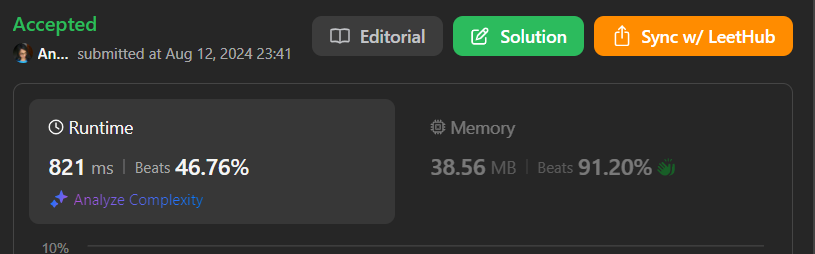

## **Tree Rerooting in DP**

In [10]:
from typing import List

class Solution:
    def __init__(self):
        self.tree  = []
        self.dp = [] # stores sum of distances of node i to all nodes in its subtree
        self.subtree_size=[] # stores the size of subtree rooted at node i
        result  = [] # stores the sum of distance from node i to all other nodes

    def dfs1(self, node, parent):
        print(f"========Invoked dfs1()=======")
        print(f"node : {node} parent : {parent}")
        # Initliaze the subtree size
        self.subtree_size[node] = 1
        # print(f"Initliaze size of {node} : {self.subtree_size[node]}")
        print(f"self.subtree_size : {self.subtree_size}")

        # Initialize dp[node] as 0 
        self.dp[node] = 0
        # print(f"dp at {node} :{self.dp[node]}")
        print(f" dp : {self.dp}")

        for child in self.tree[node]:
            print(f"child: {child}")
            if child == parent:
                continue

            self.dfs1(child, node)
            print(f"child: {child} , node: {node}")
            # Update dp[node] to include the sum of distances in the subtree of the child
            print(f"dp[node]: {self.dp[node]} + dp[child] : {self.dp[child]}  + self.subtree_size[child] : {self.subtree_size[child]} ")
            self.dp[node] += self.dp[child] + self.subtree_size[child]
            
            print(f"size of {node}  + size of {child} : {self.subtree_size[child]}")
            self.subtree_size[node] += self.subtree_size[child]

    def dfs2(self, node, parent):
        # Initial result for current node
        print(f"============Entering dfs2=========")
        self.result[node] = self.dp[node]
        print(f"self.result of node {node} : {self.result[node]}")


        for child in self.tree[node]:
            print(f"child : {child}")
            if child == parent:
                continue

            # Save original dp values
            original_dp_node = self.dp[node]
            original_dp_child = self.dp[child]

            # Perform Rerooting
            # Move the root from node to child
            print(f"dp at node {node} :{self.dp[node]} -= dp at child {child} : {self.dp[child]} + size at child {child} {self.subtree_size[child]}")
            self.dp[node] -= (self.dp[child] + self.subtree_size[child])

            print(f"dp of child {child} += dp(node:{node})  + (treesize:{len(self.tree)} - subtreesize at child {child} : {self.subtree_size[child]}")
            self.dp[child] += self.dp[node] + (len(self.tree) - self.subtree_size[child])

            # Calculate the result for the child node
            print(f"self.result at child {child} : {self.result[child]}")
            self.result[child] = self.dp[child]

            # Recursively reroot tree at the child
            self.dfs2(child, node)

            # Restore orginal dp values
            self.dp[node] = original_dp_node
            self.dp[child] = original_dp_child


    def sumOfDistancesInTree(self, n: int, edges: List[List[int]]) -> List[int]:
        self.tree = [[]for _ in range(n)]
        self.dp = [0]*n
        self.subtree_size = [0]*n
        self.result = [0]*n

        # Build the tree
        for u, v in edges:
            self.tree[u].append(v)
            self.tree[v].append(u)

        # step 1 : Run the first dfs to compute the values for the root node
        self.dfs1(0, -1)

        # Step 2: Run the second dfs to reroot the tree and compute the result for all nodes 
        self.dfs2(0, -1)

        return self.result

In [11]:
edges = [[0,1],[0,2],[2,3],[2,4],[2,5]]
n = 6
sol = Solution()
sol.sumOfDistancesInTree(n, edges)

========Invoked dfs1()=======
node : 0 parent : -1
self.subtree_size : [1, 0, 0, 0, 0, 0]
 dp : [0, 0, 0, 0, 0, 0]
child: 1
========Invoked dfs1()=======
node : 1 parent : 0
self.subtree_size : [1, 1, 0, 0, 0, 0]
 dp : [0, 0, 0, 0, 0, 0]
child: 0
child: 1 , node: 0
dp[node]: 0 + dp[child] : 0  + self.subtree_size[child] : 1 
size of 0  + size of 1 : 1
child: 2
========Invoked dfs1()=======
node : 2 parent : 0
self.subtree_size : [2, 1, 1, 0, 0, 0]
 dp : [1, 0, 0, 0, 0, 0]
child: 0
child: 3
========Invoked dfs1()=======
node : 3 parent : 2
self.subtree_size : [2, 1, 1, 1, 0, 0]
 dp : [1, 0, 0, 0, 0, 0]
child: 2
child: 3 , node: 2
dp[node]: 0 + dp[child] : 0  + self.subtree_size[child] : 1 
size of 2  + size of 3 : 1
child: 4
========Invoked dfs1()=======
node : 4 parent : 2
self.subtree_size : [2, 1, 2, 1, 1, 0]
 dp : [1, 0, 1, 0, 0, 0]
child: 2
child: 4 , node: 2
dp[node]: 1 + dp[child] : 0  + self.subtree_size[child] : 1 
size of 2  + size of 4 : 1
child: 5
========Invoked dfs1()=====

[8, 12, 6, 10, 10, 10]

In [ ]:
class Solution:
    def __init__():
        self.tree = []
        self.dp = []
        self.subtree_size = []
        self.result = []

    def dfs1(self, node, parent):
        self.subtree_size[node] = 1
        self.dp[node] = 0

        for child in self.tree[node]:
            if child == parent:
                continue

            self.dfs1(child, node)

            self.dp[node] += self.dp[child] + self.subtree_size[child]
            self.subtree_size[node] += self.subtree_size[child]

    def dfs2(self, node, parent):
        self.result[node] = self.dp[node]

        for child in self.tree[node]:
            if child == parent:
                continue

            original_dp_node = self.dp[node]
            original_dp_child = self.dp[child]

            # Perform rerooting
            self.dp[node] -= (self.dp[child] + self.subtree_size[child])
            self.dp[child] += self.dp[node] + (len(self.tree) - self.subtree_size[child])

            # Recursively reroot tree at the child
            self.dfs(child, node)

            # Restore original dp values 
            self.dp[node] = original_dp_node
            self.dp[child] = original_dp_child

            
            
            
                                               
        

        